Directory Access

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks


import libary

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats   
import scipy.special

# machine learning
import sklearn.linear_model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder 
import sklearn.ensemble  
import sklearn.kernel_ridge 
from sklearn.metrics import mean_squared_error

# deep learning
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# ata visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

# Data Extraction

In [ ]:
train_df = pd.read_csv('Dataset/Learn ML 2021 Grand AI Challenge/new_train.csv')
test_df = pd.read_csv('Dataset/Learn ML 2021 Grand AI Challenge/new_test.csv')
samsub_df = pd.read_csv('Dataset/Learn ML 2021 Grand AI Challenge/new_sample_submission.csv')

Training Data

In [ ]:
train_df.head()

,Date,Open-Stock-1,High-Stock-1,Low-Stock-1,Close-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,Open-Stock-2,High-Stock-2,Low-Stock-2,Close-Stock-2,VWAP-Stock-2,Volume-Stock-2,Turnover-Stock-2,Open-Stock-3,High-Stock-3,Low-Stock-3,Close-Stock-3,VWAP-Stock-3,Volume-Stock-3,Turnover-Stock-3,Open-Stock-4,High-Stock-4,Low-Stock-4,Close-Stock-4,VWAP-Stock-4,Volume-Stock-4,Turnover-Stock-4,Open-Stock-5,High-Stock-5,Low-Stock-5,Close-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5
0,2010-06-01,1889.7,1890.00,1838.00,1855.10,1855.75,568273,105457457545000,285.40,285.95,281.50,283.00,283.72,3191773,90557243170000,2095.00,2097.8,2045.00,2077.25,2088.95,70547,14736933230000,851.65,864.80,833.1,837.95,844.44,3878011,327474904340000,1235.0,1238.00,1177.0,1181.70,1197.29,1786082,213845404410000
1,2010-06-02,1848.0,1862.75,1828.00,1853.05,1842.82,945167,174177161135000,284.00,284.80,279.25,281.30,281.05,2704797,76017076445000,2061.45,2098.0,2023.00,2079.85,2059.52,55547,11440017990000,844.70,849.90,823.0,842.30,838.31,3320996,278403743240000,1195.0,1206.95,1168.5,1201.15,1189.87,1307410,155564994855000
2,2010-06-03,1864.1,1910.00,1864.10,1905.60,1893.91,679689,128727119355000,283.00,286.85,282.50,285.50,285.34,2489752,71043460510000,2131.50,2131.5,2091.05,2114.90,2107.84,55130,11620529360000,851.40,859.05,848.2,854.10,853.51,2494522,212910342645000,1211.0,1248.00,1211.0,1242.30,1231.63,1482919,182640434320000
3,2010-06-04,1906.0,1909.80,1880.10,1885.70,1889.21,509435,96242800140000,288.85,291.80,277.00,290.85,289.81,3188813,92414802585000,2114.90,2156.0,2095.50,2146.75,2145.36,29302,6286330280000,854.10,868.60,854.1,865.85,862.85,2963920,255740999120000,1240.0,1258.00,1240.0,1245.45,1249.72,1454459,181767075850000
4,2010-06-07,1867.0,1894.85,1808.35,1876.65,1873.32,961913,180196832650000,285.00,289.10,285.00,287.70,287.01,2198836,63109395135000,2132.35,2209.0,2112.00,2185.25,2180.52,78919,17208425860000,712.00,850.00,712.0,841.95,839.89,3471483,291567400640000,1218.6,1225.00,1196.0,1214.80,1209.27,1424594,172272511430000


Testing Data

In [ ]:
test_df.head()

,Date,Open-Stock-1,High-Stock-1,Low-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,Open-Stock-2,High-Stock-2,Low-Stock-2,VWAP-Stock-2,Volume-Stock-2,Turnover-Stock-2,Open-Stock-3,High-Stock-3,Low-Stock-3,VWAP-Stock-3,Volume-Stock-3,Turnover-Stock-3,Open-Stock-4,High-Stock-4,Low-Stock-4,VWAP-Stock-4,Volume-Stock-4,Turnover-Stock-4,Open-Stock-5,High-Stock-5,Low-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5
0,2011-08-04,484.1,488.90,475.00,481.00,1829606,88003633160000,204.90,206.75,199.20,202.98,10501999,213174133870000,3011.15,3119.95,3011.15,3078.97,53783,16559616060000,1008.50,1015.0,990.00,1003.31,2716435,272542181190000,1303.6,1312.8,1281.00,1297.04,1569675,203593328285000
1,2011-08-05,465.0,475.80,457.10,469.56,3156094,148196817355000,195.00,198.00,190.50,194.86,13424736,261588793565000,3091.65,3095.00,3012.00,3061.60,129372,39608524605000,970.00,979.7,950.00,961.50,4644498,446567961345000,1245.0,1252.5,1200.00,1229.09,3125692,384176649890000
2,2011-08-08,463.0,480.00,458.05,465.04,4308373,200357861965000,193.90,197.80,189.65,194.89,9002509,175445729750000,3015.05,3109.00,3010.00,3069.09,46725,14340318455000,940.05,975.0,933.40,953.24,3450619,328925252905000,1205.2,1265.8,1200.55,1232.93,1660178,204687918340000
3,2011-08-09,450.0,473.55,449.85,460.88,4490924,206978212685000,190.25,202.10,190.10,197.61,19202643,379464261110000,3070.00,3164.00,2988.00,3113.84,88749,27635029505000,915.00,967.6,910.45,938.80,5346085,501890604795000,1190.5,1238.3,1180.90,1206.06,3618186,436376441205000
4,2011-08-10,494.8,494.80,473.40,478.06,3267226,156192368225000,202.00,202.85,196.00,199.07,9274996,184640866420000,3125.00,3195.00,3125.00,3170.39,52720,16714302965000,963.95,971.2,957.70,964.75,3379659,326053305165000,1242.0,1253.7,1225.30,1242.10,1903396,236421421150000


Sample Submission Data

In [ ]:
samsub_df.head()

,Date,Close-Stock-1,Close-Stock-2,Close-Stock-3,Close-Stock-4,Close-Stock-5
0,2011-08-04,476.45,199.95,3091.65,993.15,1285.95
1,2011-08-05,473.05,196.40,3058.90,966.50,1242.05
2,2011-08-08,462.10,195.00,3080.70,950.90,1235.45
3,2011-08-09,464.45,199.75,3148.00,940.15,1205.20
4,2011-08-10,479.90,197.10,3154.85,963.70,1250.10


# Exploratory Data Analytics
check dataset shape

In [ ]:
print(f'Training Data: {train_df.shape[0]} Row - {train_df.shape[1]} Column')
print(f'Testing Data: {test_df.shape[0]} Row - {test_df.shape[1]} Column')

Training Data: 299 Row - 36 Column
Testing Data: 97 Row - 31 Column


## Checking Datasets info

check training dataset info

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              299 non-null    object 
 1   Open-Stock-1      299 non-null    float64
 2   High-Stock-1      299 non-null    float64
 3   Low-Stock-1       299 non-null    float64
 4   Close-Stock-1     299 non-null    float64
 5   VWAP-Stock-1      299 non-null    float64
 6   Volume-Stock-1    299 non-null    int64  
 7   Turnover-Stock-1  299 non-null    int64  
 8   Open-Stock-2      299 non-null    float64
 9   High-Stock-2      299 non-null    float64
 10  Low-Stock-2       299 non-null    float64
 11  Close-Stock-2     299 non-null    float64
 12  VWAP-Stock-2      299 non-null    float64
 13  Volume-Stock-2    299 non-null    int64  
 14  Turnover-Stock-2  299 non-null    int64  
 15  Open-Stock-3      299 non-null    float64
 16  High-Stock-3      299 non-null    float64
 1

check testing dataset info

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              97 non-null     object 
 1   Open-Stock-1      97 non-null     float64
 2   High-Stock-1      97 non-null     float64
 3   Low-Stock-1       97 non-null     float64
 4   VWAP-Stock-1      97 non-null     float64
 5   Volume-Stock-1    97 non-null     int64  
 6   Turnover-Stock-1  97 non-null     int64  
 7   Open-Stock-2      97 non-null     float64
 8   High-Stock-2      97 non-null     float64
 9   Low-Stock-2       97 non-null     float64
 10  VWAP-Stock-2      97 non-null     float64
 11  Volume-Stock-2    97 non-null     int64  
 12  Turnover-Stock-2  97 non-null     int64  
 13  Open-Stock-3      97 non-null     float64
 14  High-Stock-3      97 non-null     float64
 15  Low-Stock-3       97 non-null     float64
 16  VWAP-Stock-3      97 non-null     float64
 17 

## Checking Datasets Missing Values
training dataset

In [ ]:
train_mv = train_df.isna().sum()
train_mv

Date                0
Open-Stock-1        0
High-Stock-1        0
Low-Stock-1         0
Close-Stock-1       0
VWAP-Stock-1        0
Volume-Stock-1      0
Turnover-Stock-1    0
Open-Stock-2        0
High-Stock-2        0
Low-Stock-2         0
Close-Stock-2       0
VWAP-Stock-2        0
Volume-Stock-2      0
Turnover-Stock-2    0
Open-Stock-3        0
High-Stock-3        0
Low-Stock-3         0
Close-Stock-3       0
VWAP-Stock-3        0
Volume-Stock-3      0
Turnover-Stock-3    0
Open-Stock-4        0
High-Stock-4        0
Low-Stock-4         0
Close-Stock-4       0
VWAP-Stock-4        0
Volume-Stock-4      0
Turnover-Stock-4    0
Open-Stock-5        0
High-Stock-5        0
Low-Stock-5         0
Close-Stock-5       0
VWAP-Stock-5        0
Volume-Stock-5      0
Turnover-Stock-5    0
dtype: int64

testing dataset

In [ ]:
test_mv = test_df.isna().sum()
test_mv

Date                0
Open-Stock-1        0
High-Stock-1        0
Low-Stock-1         0
VWAP-Stock-1        0
Volume-Stock-1      0
Turnover-Stock-1    0
Open-Stock-2        0
High-Stock-2        0
Low-Stock-2         0
VWAP-Stock-2        0
Volume-Stock-2      0
Turnover-Stock-2    0
Open-Stock-3        0
High-Stock-3        0
Low-Stock-3         0
VWAP-Stock-3        0
Volume-Stock-3      0
Turnover-Stock-3    0
Open-Stock-4        0
High-Stock-4        0
Low-Stock-4         0
VWAP-Stock-4        0
Volume-Stock-4      0
Turnover-Stock-4    0
Open-Stock-5        0
High-Stock-5        0
Low-Stock-5         0
VWAP-Stock-5        0
Volume-Stock-5      0
Turnover-Stock-5    0
dtype: int64

## Datasets Statistical Describe
Training Data

In [ ]:
train_df.describe()

,Open-Stock-1,High-Stock-1,Low-Stock-1,Close-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,Open-Stock-2,High-Stock-2,Low-Stock-2,Close-Stock-2,VWAP-Stock-2,Volume-Stock-2,Turnover-Stock-2,Open-Stock-3,High-Stock-3,Low-Stock-3,Close-Stock-3,VWAP-Stock-3,Volume-Stock-3,Turnover-Stock-3,Open-Stock-4,High-Stock-4,Low-Stock-4,Close-Stock-4,VWAP-Stock-4,Volume-Stock-4,Turnover-Stock-4,Open-Stock-5,High-Stock-5,Low-Stock-5,Close-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5
count,299.000000,299.000000,299.000000,299.000000,299.000000,2.990000e+02,2.990000e+02,299.000000,299.000000,299.000000,299.000000,299.000000,2.990000e+02,2.990000e+02,299.000000,299.000000,299.000000,299.000000,299.000000,2.990000e+02,2.990000e+02,299.000000,299.000000,299.000000,299.000000,299.000000,2.990000e+02,2.990000e+02,299.000000,299.000000,299.000000,299.000000,299.000000,2.990000e+02,2.990000e+02
mean,2143.761371,2168.767057,2117.974080,2143.821572,2143.167692,8.887711e+05,1.745160e+14,194.891973,197.075753,192.474916,194.908863,194.887759,6.458382e+06,1.204030e+14,2701.216221,2738.352676,2665.551839,2698.490468,2702.157258,9.825917e+04,2.703371e+13,1042.224916,1057.009197,1027.838127,1042.537291,1043.030702,3.684102e+06,3.847515e+14,1334.502508,1352.688629,1314.262542,1333.175753,1333.481204,1.452351e+06,1.929843e+14
std,410.899677,415.209457,405.959346,410.811877,410.279270,6.008330e+05,8.226473e+13,44.718733,45.140896,44.427882,44.953631,44.908437,3.794925e+06,6.552082e+13,244.542744,247.419405,241.140781,242.712107,244.001772,1.334930e+05,4.019205e+13,96.691557,95.693321,94.176226,94.124373,94.085013,1.675875e+06,1.817891e+14,100.768718,100.730048,99.079224,99.713093,99.205523,7.033592e+05,9.361878e+13
min,478.700000,487.900000,476.000000,482.050000,481.890000,3.925400e+04,9.406739e+12,152.500000,155.850000,149.000000,150.650000,151.960000,1.118075e+06,1.983666e+13,2061.450000,2097.800000,2023.000000,2077.250000,2059.520000,8.816000e+03,2.339094e+12,712.000000,834.200000,712.000000,817.500000,823.480000,4.235880e+05,5.394387e+13,1156.100000,1194.800000,1150.000000,1160.650000,1169.910000,7.335200e+04,1.138273e+13
25%,2079.200000,2110.100000,2052.775000,2083.000000,2083.265000,5.485695e+05,1.141443e+14,169.125000,170.900000,167.050000,168.750000,169.155000,4.079292e+06,7.776406e+13,2545.000000,2579.550000,2506.175000,2534.500000,2542.400000,3.781300e+04,1.014719e+13,999.950000,1011.200000,987.875000,1000.775000,1000.215000,2.531522e+06,2.669888e+14,1253.175000,1270.875000,1235.500000,1254.050000,1254.165000,9.689265e+05,1.300165e+14
50%,2230.000000,2264.900000,2205.200000,2232.000000,2226.640000,7.367350e+05,1.584380e+14,176.700000,178.400000,174.000000,176.500000,176.250000,5.769577e+06,1.084020e+14,2674.000000,2709.000000,2645.000000,2663.200000,2670.070000,6.491600e+04,1.711518e+13,1047.850000,1065.450000,1036.150000,1049.200000,1051.980000,3.310703e+06,3.370082e+14,1314.000000,1329.500000,1292.000000,1311.500000,1309.890000,1.324664e+06,1.747469e+14
75%,2354.900000,2380.000000,2329.250000,2355.000000,2355.085000,1.011911e+06,2.094621e+14,194.275000,196.075000,193.000000,194.550000,194.350000,7.958142e+06,1.457942e+14,2828.625000,2871.775000,2801.000000,2820.325000,2835.015000,1.184385e+05,3.277625e+13,1112.100000,1124.000000,1095.200000,1110.600000,1108.635000,4.321131e+06,4.636005e+14,1386.500000,1402.750000,1370.000000,1384.750000,1385.440000,1.702507e+06,2.268061e+14
max,2566.000000,2583.300000,2553.700000,2565.800000,2570.700000,5.354489e+06,4.793651e+14,309.750000,313.450000,309.000000,312.800000,311.830000,3.032827e+07,5.012088e+14,3341.150000,3387.000000,3283.550000,3313.950000,3324.140000,1.871721e+06,5.883493e+14,1273.000000,1279.000000,1269.350000,1273.350000,1273.500000,1.167429e+07,1.278359e+15,1595.000000,1608.500000,1571.100000,1588.750000,1587.400000,5.100637e+06,7.278991e+14


Testing Data

In [ ]:
test_df.describe()

,Open-Stock-1,High-Stock-1,Low-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,Open-Stock-2,High-Stock-2,Low-Stock-2,VWAP-Stock-2,Volume-Stock-2,Turnover-Stock-2,Open-Stock-3,High-Stock-3,Low-Stock-3,VWAP-Stock-3,Volume-Stock-3,Turnover-Stock-3,Open-Stock-4,High-Stock-4,Low-Stock-4,VWAP-Stock-4,Volume-Stock-4,Turnover-Stock-4,Open-Stock-5,High-Stock-5,Low-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5
count,97.000000,97.000000,97.000000,97.000000,9.700000e+01,9.700000e+01,97.000000,97.000000,97.000000,97.000000,9.700000e+01,9.700000e+01,97.000000,97.000000,97.000000,97.000000,97.000000,9.700000e+01,97.00000,97.000000,97.000000,97.000000,9.700000e+01,9.700000e+01,97.000000,97.000000,97.000000,97.000000,9.700000e+01,9.700000e+01
mean,462.797938,468.927320,454.296907,461.324433,3.699676e+06,1.692479e+14,201.485567,203.727835,198.887113,201.374227,7.446208e+06,1.495560e+14,3056.009278,3096.781959,3007.515979,3054.415979,60463.804124,1.842477e+13,835.93299,847.567526,818.647938,832.400206,5.057989e+06,4.110386e+14,1061.034021,1077.129381,1037.350000,1056.405155,2.327611e+06,2.441583e+14
std,19.652975,18.623412,19.915375,19.090980,2.389608e+06,1.075721e+14,5.789848,5.447256,6.026721,5.649113,3.288226e+06,6.515726e+13,169.927172,170.559792,179.088919,176.198501,36157.861502,1.106968e+13,79.74421,79.876887,79.265502,79.378418,3.343411e+06,2.391757e+14,99.045187,100.954878,99.373132,100.593109,8.013082e+05,8.495205e+13
min,406.000000,413.000000,400.250000,405.950000,4.990710e+05,2.354729e+13,190.000000,192.900000,185.000000,188.190000,1.680808e+06,3.567764e+13,2647.150000,2692.000000,2550.000000,2629.550000,5969.000000,1.832347e+12,662.00000,671.000000,641.000000,651.480000,9.228580e+05,8.071381e+13,841.000000,841.000000,808.850000,821.360000,4.313230e+05,4.861017e+13
25%,450.000000,456.250000,440.500000,448.230000,2.435773e+06,1.142969e+14,197.350000,200.000000,195.000000,197.610000,5.177991e+06,1.032756e+14,2956.850000,2980.000000,2902.050000,2951.620000,34350.000000,1.054268e+13,765.30000,776.000000,753.100000,761.040000,3.236151e+06,2.782966e+14,984.400000,1005.000000,967.250000,986.340000,1.811853e+06,1.954271e+14
50%,463.700000,472.000000,455.900000,464.330000,3.134201e+06,1.453836e+14,201.500000,203.200000,198.100000,200.650000,6.701633e+06,1.343024e+14,3101.100000,3145.000000,3050.150000,3109.570000,52009.000000,1.568747e+13,857.00000,868.650000,838.350000,851.850000,4.644498e+06,3.660448e+14,1073.600000,1094.600000,1045.000000,1068.570000,2.185228e+06,2.323064e+14
75%,478.700000,484.850000,470.700000,477.100000,4.344521e+06,2.024181e+14,204.900000,206.500000,202.750000,204.470000,8.977302e+06,1.754457e+14,3179.650000,3208.000000,3132.000000,3176.500000,78525.000000,2.284667e+13,886.90000,896.250000,870.150000,881.670000,5.926423e+06,5.015670e+14,1131.000000,1140.950000,1105.700000,1126.840000,2.686166e+06,2.855063e+14
max,494.800000,497.650000,488.400000,494.240000,2.065750e+07,9.582166e+14,215.350000,216.200000,212.900000,214.460000,2.281941e+07,4.529558e+14,3318.900000,3333.000000,3259.000000,3291.040000,207594.000000,6.345797e+13,1008.50000,1015.000000,990.000000,1003.310000,3.188750e+07,2.284902e+15,1303.600000,1312.800000,1281.000000,1297.040000,6.108295e+06,6.948702e+14


## Check Distribution for each Close Stocks 
Close Stock 1 Distribution

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


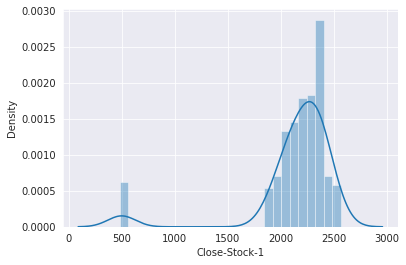

In [ ]:
sns.distplot(train_df['Close-Stock-1'])

Close Stock 2 Distribution

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


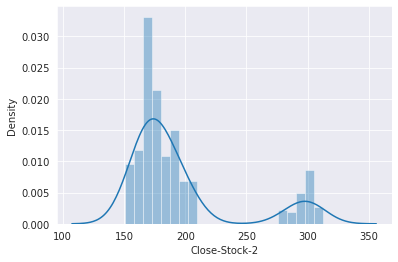

In [ ]:
sns.distplot(train_df['Close-Stock-2'])

Close Stock 3 Distribution

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


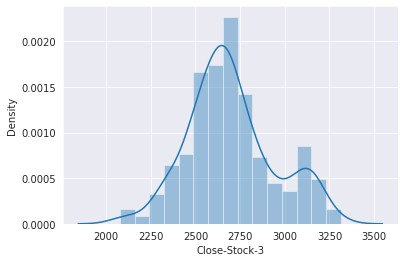

In [ ]:
sns.distplot(train_df['Close-Stock-3'])

Close Stock 4 Distribution

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


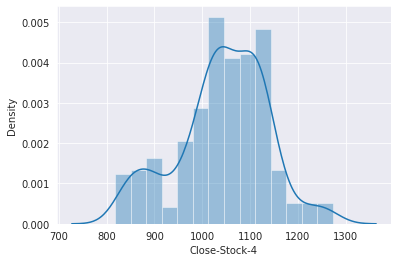

In [ ]:
sns.distplot(train_df['Close-Stock-4'])

Close Stock 5 Distribution

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


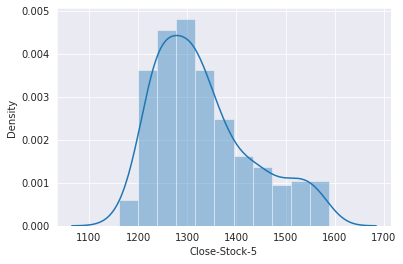

In [ ]:
sns.distplot(train_df['Close-Stock-5'])

all numeric cols

In [ ]:
numeric_var = train_df.dtypes[train_df.dtypes != 'object'].index
numeric_var

Index(['Open-Stock-1', 'High-Stock-1', 'Low-Stock-1', 'Close-Stock-1',
       'VWAP-Stock-1', 'Volume-Stock-1', 'Turnover-Stock-1', 'Open-Stock-2',
       'High-Stock-2', 'Low-Stock-2', 'Close-Stock-2', 'VWAP-Stock-2',
       'Volume-Stock-2', 'Turnover-Stock-2', 'Open-Stock-3', 'High-Stock-3',
       'Low-Stock-3', 'Close-Stock-3', 'VWAP-Stock-3', 'Volume-Stock-3',
       'Turnover-Stock-3', 'Open-Stock-4', 'High-Stock-4', 'Low-Stock-4',
       'Close-Stock-4', 'VWAP-Stock-4', 'Volume-Stock-4', 'Turnover-Stock-4',
       'Open-Stock-5', 'High-Stock-5', 'Low-Stock-5', 'Close-Stock-5',
       'VWAP-Stock-5', 'Volume-Stock-5', 'Turnover-Stock-5'],
      dtype='object')

## Check Correlaton for Each Close Stocks
Stock 1 Correlation

In [ ]:
stock1 = train_df[['Open-Stock-1', 'High-Stock-1', 'Low-Stock-1', 'Close-Stock-1',
       'VWAP-Stock-1', 'Volume-Stock-1', 'Turnover-Stock-1']]
stock1

,Open-Stock-1,High-Stock-1,Low-Stock-1,Close-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1
0,1889.70,1890.00,1838.00,1855.10,1855.75,568273,105457457545000
1,1848.00,1862.75,1828.00,1853.05,1842.82,945167,174177161135000
2,1864.10,1910.00,1864.10,1905.60,1893.91,679689,128727119355000
3,1906.00,1909.80,1880.10,1885.70,1889.21,509435,96242800140000
4,1867.00,1894.85,1808.35,1876.65,1873.32,961913,180196832650000
...,...,...,...,...,...,...,...
294,499.50,499.50,484.60,487.30,489.79,5354489,262255417380000
295,489.90,489.90,481.10,486.80,485.65,2997667,145582296035000
296,493.45,495.95,484.50,488.00,489.14,2202354,107726909450000
297,487.90,487.90,480.00,482.85,483.30,1982494,95814144795000


Display Stock 1 correlation

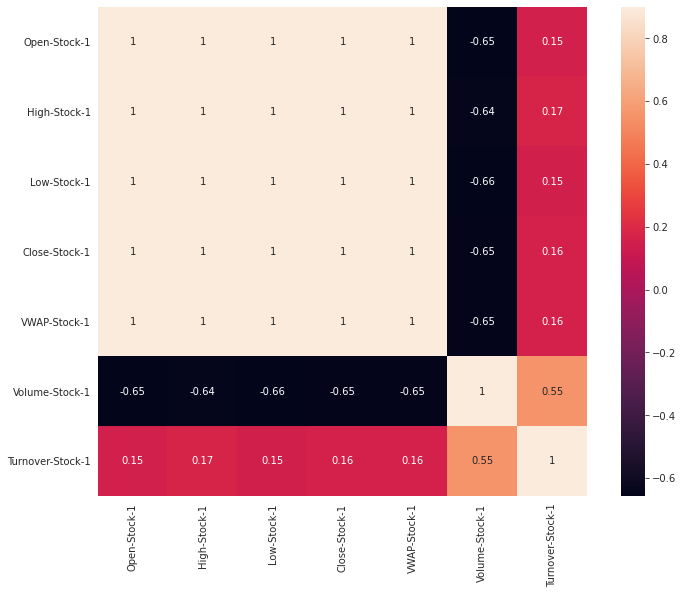

In [ ]:
plt.subplots(figsize=(12,9))
sns.heatmap(stock1.corr(), vmax = 0.9, square = True, annot=True)

Stock 2 Correlation

In [ ]:
stock2 = train_df[['Open-Stock-2', 'High-Stock-2', 'Low-Stock-2', 'Close-Stock-2',
       'VWAP-Stock-2', 'Volume-Stock-2', 'Turnover-Stock-2']]
stock2

,Open-Stock-2,High-Stock-2,Low-Stock-2,Close-Stock-2,VWAP-Stock-2,Volume-Stock-2,Turnover-Stock-2
0,285.40,285.95,281.50,283.00,283.72,3191773,90557243170000
1,284.00,284.80,279.25,281.30,281.05,2704797,76017076445000
2,283.00,286.85,282.50,285.50,285.34,2489752,71043460510000
3,288.85,291.80,277.00,290.85,289.81,3188813,92414802585000
4,285.00,289.10,285.00,287.70,287.01,2198836,63109395135000
...,...,...,...,...,...,...,...
294,198.35,207.00,198.35,206.25,204.68,16270594,333026806690000
295,205.50,211.25,205.25,208.35,208.89,13288551,277587677435000
296,210.00,211.25,208.10,208.90,209.13,7104094,148570564060000
297,207.70,208.35,202.85,204.75,205.13,7645467,156835059215000


Display Stock 2 correlation

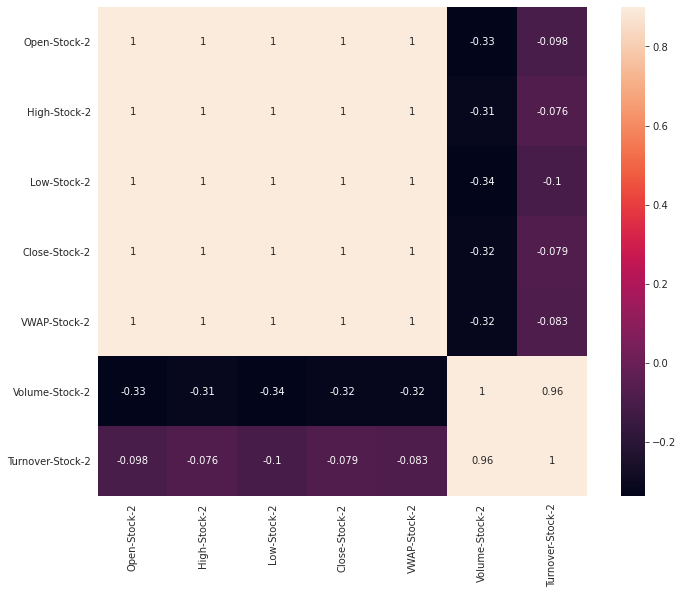

In [ ]:
plt.subplots(figsize=(12,9))
sns.heatmap(stock2.corr(), vmax = 0.9, square = True, annot=True)

Stock 3 Correlation

In [ ]:
stock3 = train_df[['Open-Stock-3', 'High-Stock-3', 'Low-Stock-3', 'Close-Stock-3',
       'VWAP-Stock-3', 'Volume-Stock-3', 'Turnover-Stock-3']]
stock3

,Open-Stock-3,High-Stock-3,Low-Stock-3,Close-Stock-3,VWAP-Stock-3,Volume-Stock-3,Turnover-Stock-3
0,2095.00,2097.80,2045.00,2077.25,2088.95,70547,14736933230000
1,2061.45,2098.00,2023.00,2079.85,2059.52,55547,11440017990000
2,2131.50,2131.50,2091.05,2114.90,2107.84,55130,11620529360000
3,2114.90,2156.00,2095.50,2146.75,2145.36,29302,6286330280000
4,2132.35,2209.00,2112.00,2185.25,2180.52,78919,17208425860000
...,...,...,...,...,...,...,...
294,3105.85,3143.00,3105.85,3120.85,3121.98,155200,48453078985000
295,3122.40,3140.05,3115.00,3134.00,3129.24,28578,8942753035000
296,3141.95,3163.00,3053.50,3067.85,3100.07,36332,11263166685000
297,3067.85,3069.00,3001.10,3052.15,3047.39,177189,53996461955000


Display Stock 3 correlation

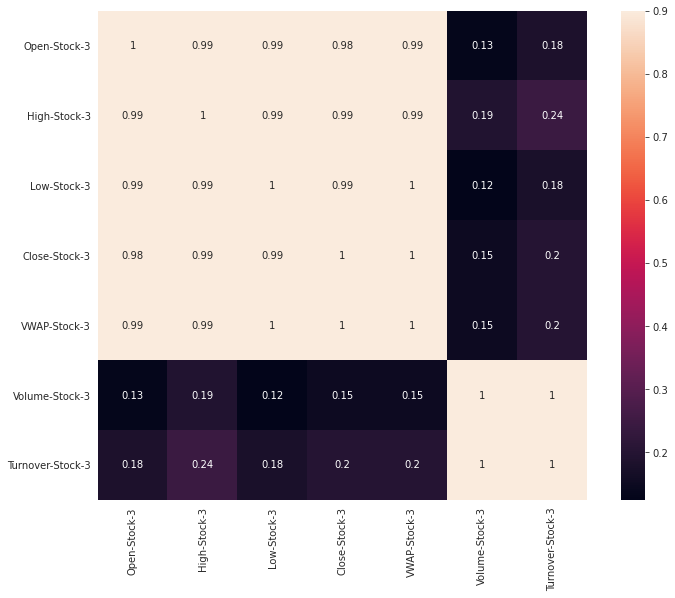

In [ ]:
plt.subplots(figsize=(12,9))
sns.heatmap(stock3.corr(), vmax = 0.9, square = True, annot=True)

Stock 4 Correlation

In [ ]:
stock4 = train_df[['Open-Stock-4', 'High-Stock-4', 'Low-Stock-4', 'Close-Stock-4',
       'VWAP-Stock-4', 'Volume-Stock-4', 'Turnover-Stock-4']]
stock4

,Open-Stock-4,High-Stock-4,Low-Stock-4,Close-Stock-4,VWAP-Stock-4,Volume-Stock-4,Turnover-Stock-4
0,851.65,864.80,833.10,837.95,844.44,3878011,327474904340000
1,844.70,849.90,823.00,842.30,838.31,3320996,278403743240000
2,851.40,859.05,848.20,854.10,853.51,2494522,212910342645000
3,854.10,868.60,854.10,865.85,862.85,2963920,255740999120000
4,712.00,850.00,712.00,841.95,839.89,3471483,291567400640000
...,...,...,...,...,...,...,...
294,1012.10,1035.50,1010.00,1017.45,1021.77,3823471,390670692820000
295,1011.00,1051.00,1003.60,1036.75,1032.52,6537105,674969821765000
296,1052.80,1059.70,1038.70,1045.35,1049.87,2088359,219249912200000
297,1039.90,1041.35,1018.10,1021.70,1025.73,2925557,300083555650000


Display Stock 4 correlation

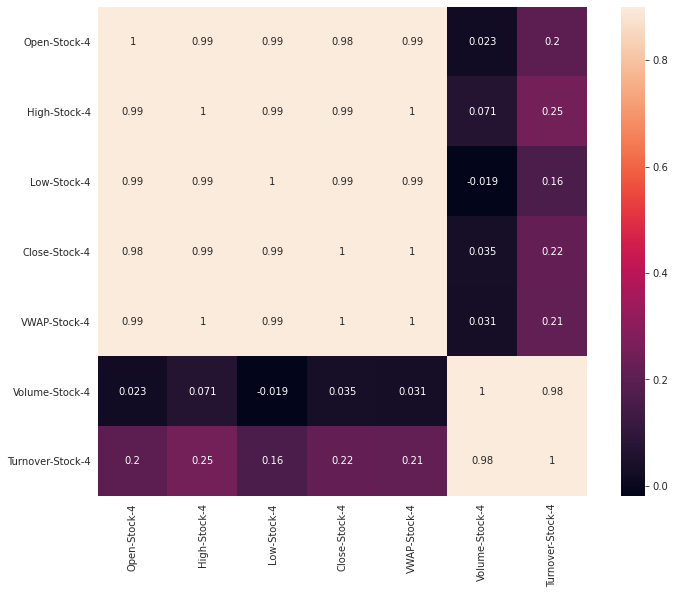

In [ ]:
plt.subplots(figsize=(12,9))
sns.heatmap(stock4.corr(), vmax = 0.9, square = True, annot=True)

Stock 5 Correlation

In [ ]:
stock5 = train_df[['Open-Stock-5', 'High-Stock-5', 'Low-Stock-5', 'Close-Stock-5',
       'VWAP-Stock-5', 'Volume-Stock-5', 'Turnover-Stock-5']]
stock5

,Open-Stock-5,High-Stock-5,Low-Stock-5,Close-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5
0,1235.0,1238.00,1177.00,1181.70,1197.29,1786082,213845404410000
1,1195.0,1206.95,1168.50,1201.15,1189.87,1307410,155564994855000
2,1211.0,1248.00,1211.00,1242.30,1231.63,1482919,182640434320000
3,1240.0,1258.00,1240.00,1245.45,1249.72,1454459,181767075850000
4,1218.6,1225.00,1196.00,1214.80,1209.27,1424594,172272511430000
...,...,...,...,...,...,...,...
294,1285.0,1307.95,1285.00,1301.50,1297.00,1353005,175484999030000
295,1300.0,1342.00,1292.40,1337.50,1325.46,1850972,245338665665000
296,1349.0,1367.55,1346.50,1353.00,1357.02,1226610,166453494180000
297,1345.0,1347.95,1326.10,1342.80,1334.07,970086,129416608470000


Display Stock 5 correlation

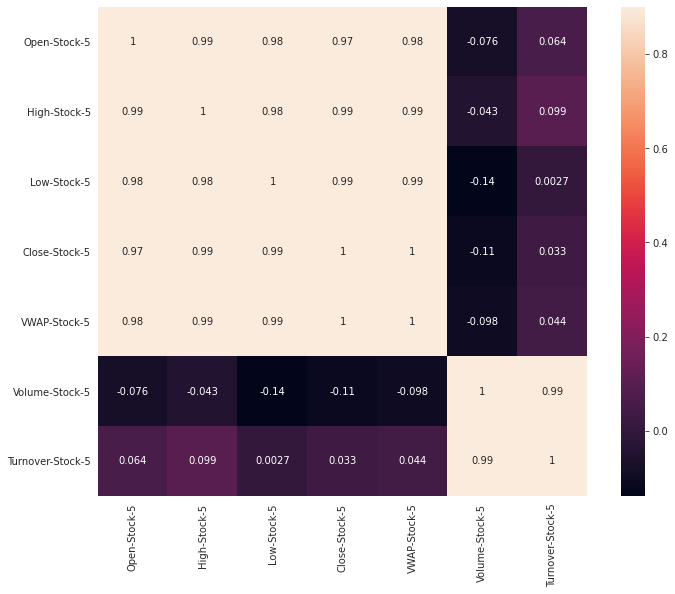

In [ ]:
plt.subplots(figsize=(12,9))
sns.heatmap(stock5.corr(), vmax = 0.9, square = True, annot=True)

# Data Modelling
split stock 1 into X (feature) and y (target)

In [ ]:
# Feature
X = stock1.drop('Close-Stock-1', axis=1)
# Target
y = stock1['Close-Stock-1']

Split into Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2)

Fit training and Transform Training using Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(X_train) 
x_test = scaler.transform(X_test)

Model 1 : Linear Regression

In [ ]:
linreg = sklearn.linear_model.LinearRegression()

linreg.fit(x_train, y_train.values.ravel())

y_pred = linreg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse_lin = np.sqrt(mse)
rmse_lin

10.917046770407977

Model 2 : Lasso Regression

In [ ]:
lasso = sklearn.linear_model.Lasso(alpha = 0.0005, random_state=1) 

lasso.fit(x_train, y_train.values.ravel())

y_pred = lasso.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse_las = np.sqrt(mse)
rmse_las

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19349.748831788223, tolerance: 4548.69730995816
  positive)


11.801513221628737

Model 3 : Elastic Net

In [ ]:
enet =  sklearn.linear_model.ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)

enet.fit(x_train, y_train.values.ravel())

y_pred = enet.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse_ent = np.sqrt(mse)
rmse_ent

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20367.366067498482, tolerance: 4548.69730995816
  positive)


11.808188929519941

Model 4 : Ridge Regression

In [ ]:
ridge = sklearn.linear_model.RidgeCV(alphas=[1, 0.1, 0.01, 0.005])
ridge.fit(x_train, y_train.values.ravel())

y_pred = ridge.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse_rdg = np.sqrt(mse)
rmse_rdg

11.018043720115926

Model 5 : Kernel Ridge

In [ ]:
krr = sklearn.kernel_ridge.KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
krr.fit(x_train, y_train.values.ravel())

y_pred = krr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse_krr = np.sqrt(mse)
rmse_krr

16.321924859272215

Model 6 : Gradient Boosting Regression

In [ ]:
gboost = sklearn.ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
gboost.fit(x_train, y_train.values.ravel())

y_pred = gboost.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse_gbr = np.sqrt(mse)
rmse_gbr

22.789395706467204

Choosing Model Based on the best Accuration

In [ ]:
score_df = pd.DataFrame({'Model':['Linear', 'Lasso', 'ElasticNet', 'Ridge', 'Kernel Ridge','Gradient Boosting'],
                         'accuracy':[rmse_lin, rmse_las, rmse_ent, rmse_rdg, rmse_krr, rmse_gbr]})
score_df.sort_values(by=['accuracy'])

,Model,accuracy
0,Linear,10.917047
3,Ridge,11.018044
1,Lasso,11.801513
2,ElasticNet,11.808189
4,Kernel Ridge,16.321925
5,Gradient Boosting,22.789396


Linear Model is the best Model Accuration

# Implement to Testing Data

In [ ]:
test_df.columns.values

array(['Date', 'Open-Stock-1', 'High-Stock-1', 'Low-Stock-1',
       'VWAP-Stock-1', 'Volume-Stock-1', 'Turnover-Stock-1',
       'Open-Stock-2', 'High-Stock-2', 'Low-Stock-2', 'VWAP-Stock-2',
       'Volume-Stock-2', 'Turnover-Stock-2', 'Open-Stock-3',
       'High-Stock-3', 'Low-Stock-3', 'VWAP-Stock-3', 'Volume-Stock-3',
       'Turnover-Stock-3', 'Open-Stock-4', 'High-Stock-4', 'Low-Stock-4',
       'VWAP-Stock-4', 'Volume-Stock-4', 'Turnover-Stock-4',
       'Open-Stock-5', 'High-Stock-5', 'Low-Stock-5', 'VWAP-Stock-5',
       'Volume-Stock-5', 'Turnover-Stock-5'], dtype=object)

stock 1 in testing set

In [ ]:
test_stock1 = test_df[['Open-Stock-1', 'High-Stock-1', 'Low-Stock-1', 'VWAP-Stock-1', 'Volume-Stock-1', 
                       'Turnover-Stock-1']]
xt1_test = scaler.fit_transform(test_stock1) 
yt1_pred=gboost.predict(xt1_test)

stock 2 in testing set

In [ ]:
test_stock2 = test_df[['Open-Stock-2', 'High-Stock-2', 'Low-Stock-2', 'VWAP-Stock-2', 'Volume-Stock-2', 
                       'Turnover-Stock-2']]
xt2_test = scaler.fit_transform(test_stock2) 
yt2_pred=gboost.predict(xt2_test)

stock 3 in testing set

In [ ]:
test_stock3 = test_df[['Open-Stock-3', 'High-Stock-3', 'Low-Stock-3', 'VWAP-Stock-3', 'Volume-Stock-3', 
                       'Turnover-Stock-3']]
xt3_test = scaler.fit_transform(test_stock3) 
yt3_pred=gboost.predict(xt3_test)

stock 4 in testing set

In [ ]:
test_stock4 = test_df[['Open-Stock-4', 'High-Stock-4', 'Low-Stock-4', 'VWAP-Stock-4', 'Volume-Stock-4', 
                       'Turnover-Stock-4']]
xt4_test = scaler.fit_transform(test_stock4) 
yt4_pred=gboost.predict(xt4_test)

stock 5 in testing set

In [ ]:
test_stock5 = test_df[['Open-Stock-5', 'High-Stock-5', 'Low-Stock-5', 'VWAP-Stock-5', 'Volume-Stock-5', 
                       'Turnover-Stock-5']]
xt5_test = scaler.fit_transform(test_stock5) 
yt5_pred=gboost.predict(xt5_test)

Prediction Result

In [ ]:
output = pd.DataFrame({'Date': test_df["Date"], 
                      'Close-Stock-1':yt1_pred,
                      'Close-Stock-2':yt2_pred,
                      'Close-Stock-3':yt3_pred,
                      'Close-Stock-4':yt4_pred,
                      'Close-Stock-5':yt5_pred})
output.head()

,Date,Close-Stock-1,Close-Stock-2,Close-Stock-3,Close-Stock-4,Close-Stock-5
0,2011-08-04,2507.551786,2262.759415,2185.182949,2508.678352,2531.440493
1,2011-08-05,2278.339042,554.150292,2064.594234,2484.157804,2499.378571
2,2011-08-08,2273.680851,729.766236,2171.065550,2499.912191,2530.807820
3,2011-08-09,2009.167036,1133.225889,2254.422110,2493.539043,2506.006002
4,2011-08-10,2500.241871,1889.161428,2412.544715,2497.231473,2500.396865


print output file

In [ ]:
output.to_csv("output.csv",index=False)  